# CURRENT QUIVER PLOT

In [1]:
#masukin library dulu 
import os
os.environ['PROJ_LIB'] = r'C:/Users/user/anaconda3/Lib/site-packages/mpl_toolkits/basemap'
import netCDF4 as nc
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   mpl_toolkits.basemap import Basemap, cm, shiftgrid, addcyclic
import matplotlib.pyplot as plt
from   netCDF4 import *

# Input Data Arus

In [2]:
#masukin lokasi .nc nya dimana
fn='D:/smt7/asisten andat/3hrly.nc4'
#buka file nc nya dan liat isinya ada apa aja (variabel dan dimensi)
ds=nc.Dataset(fn)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    classification_level: UNCLASSIFIED
    distribution_statement: Approved for public release. Distribution unlimited.
    downgrade_date: not applicable
    classification_authority: not applicable
    institution: Naval Oceanographic Office
    source: HYCOM archive file
    history: archv2ncdf3z
    field_type: instantaneous
    Conventions: CF-1.0 NAVO_netcdf_v1.0
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = GLBu0.08/expt_19.1/2000/3hrly; Translation Date = 2020-09-22T03:29:47.900Z
    geospatial_lat_min: -7.28000020980835
    geospatial_lat_max: -2.319999933242798
    geospatial_lon_min: 94.9599609375
    geospatial_lon_max: 102.0
    dimensions(sizes): time(248), depth(1), lat(63), lon(89)
    variables(dimensions): int16 water_u(time,depth,lat,lon), float64 time(time), float64 depth(depth), float64 lat(lat), float64 lon(lon), int16 water_v

## Deklarasi Data Arus
data arus yang digunakan dalam plot quiver merupakan data spasial, jadi gausah diambil di grid tertentu

In [59]:
u10=ds.variables['water_u'][0,0,:,:]
v10=ds.variables['water_v'][0,0,:,:]
lon=ds.variables['lon'][:]
lat=ds.variables['lat'][:]
time=ds.variables['time'][:]

var = np.sqrt(abs(u10*u10) + (v10*v10))

#u2=np.ma.MaskedArray.tolist(u)
#v2=np.ma.MaskedArray.tolist(v)

#melihat dimensi masing2 variabel
print('dimensi u',np.shape(u10))
print('dimensi v',np.shape(v10))
print('dimensi lon',np.shape(lon))
print('dimensi lat',np.shape(lat))
print('dimensi time',np.shape(time))

dimensi u (63, 89)
dimensi v (63, 89)
dimensi lon (89,)
dimensi lat (63,)
dimensi time (248,)


In [64]:
u, lonsout = addcyclic(u10, lon)
v, lonsout = addcyclic(v10, lon)
print ("lon[0]: ", lonsout[0], "lon[-1]: ", lonsout[-1])
print ("lat[0]: ", lat[0], "lat[-1]: ", lat[-1])

lonsout2=(lonsout[:89])
print (lonsout2[:])
print (lat[:])

lon[0]:  94.9599609375 lon[-1]:  94.9599609375
lat[0]:  -7.28000020980835 lat[-1]:  -2.319999933242798
[ 94.95996094  95.04003906  95.11999512  95.19995117  95.2800293
  95.35998535  95.43994141  95.52001953  95.59997559  95.68005371
  95.76000977  95.83996582  95.92004395  96.          96.07995605
  96.16003418  96.23999023  96.31994629  96.40002441  96.47998047
  96.56005859  96.64001465  96.7199707   96.80004883  96.88000488
  96.95996094  97.04003906  97.11999512  97.19995117  97.2800293
  97.35998535  97.43994141  97.52001953  97.59997559  97.68005371
  97.76000977  97.83996582  97.92004395  98.          98.07995605
  98.16003418  98.23999023  98.31994629  98.40002441  98.47998047
  98.56005859  98.64001465  98.7199707   98.80004883  98.88000488
  98.95996094  99.04003906  99.11999512  99.19995117  99.2800293
  99.35998535  99.43994141  99.52001953  99.59997559  99.68005371
  99.76000977  99.83996582  99.92004395 100.         100.07995605
 100.16003418 100.23999023 100.31994629 10

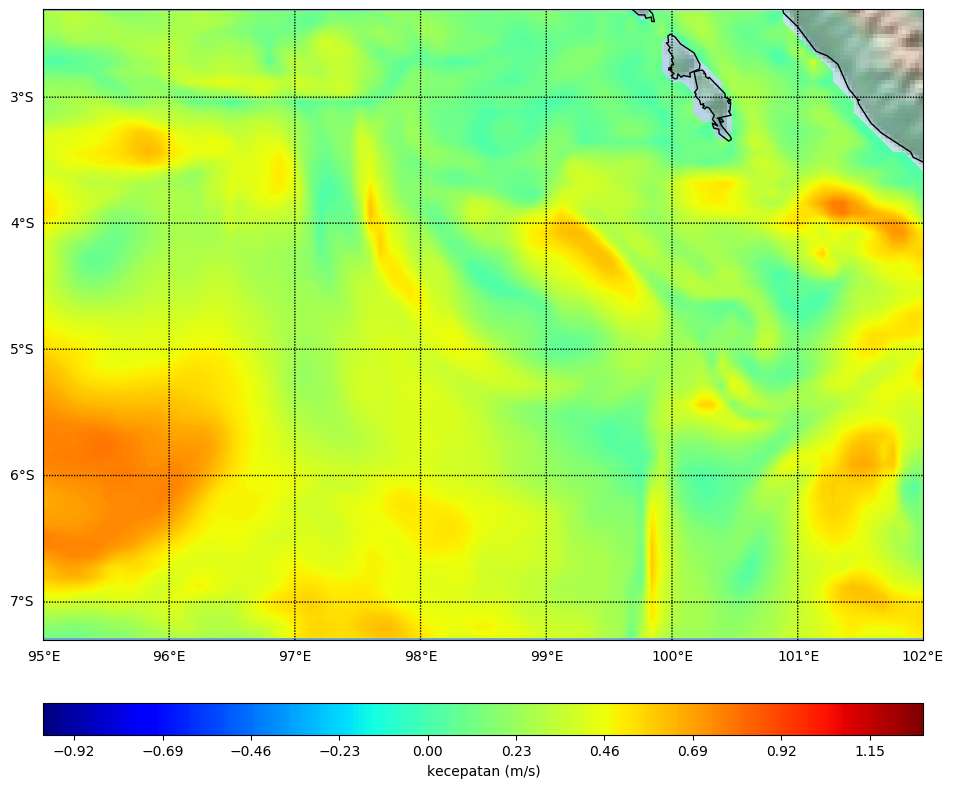

In [56]:
#-- Membuat figure
dpi = 100
fig = plt.figure(figsize=(1100/dpi, 1100/dpi), dpi=dpi)
ax  = fig.add_axes([0.1,0.1,0.8,0.9])

#-- Membuat map
#map = Basemap(projection='cyl',llcrnrlat= -7.3,urcrnrlat= -2.3,\
            #resolution='c',  llcrnrlon=95,urcrnrlon=102.)
map = Basemap(projection='merc',llcrnrlat= -7.3,urcrnrlat= -2.3,\
            resolution='i',  llcrnrlon=95,urcrnrlon=102)
#map = Basemap(llcrnrlon=95,llcrnrlat=-2.3,urcrnrlon=102,urcrnrlat=-7.3,
             #resolution='i', projection='merc' ,lat_0 = 39.5, lon_0 = 0.)

map.shadedrelief()

#-- draw coastlines, state and country boundaries, edge of map
map.drawcoastlines()
map.drawstates()
map.drawcountries()

#-- create and draw meridians and parallels grid lines
map.drawparallels(np.arange(-90,90,1),labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180,180,1),labels=[0,0,0,1],fontsize=10)

#-- convert latitude/longitude values to plot x/y values
x, y = map(*np.meshgrid(lon,lat))

#-- contour levels
clevs = np.arange(-1,1.3,0.01) #bisa diubah2 sesuai cakupan data

#-- draw filled contours
cnplot = map.contourf(x,y,var,clevs,cmap=plt.cm.jet)

#-- add colorbar
cbar = map.colorbar(cnplot,location='bottom',pad="10%")      #-- pad: distance between map and colorbar
cbar.set_label('kecepatan (m/s)')                            #-- add colorbar title string

In [67]:
#-- transformasi vector dan data koordinat
veclon = u10.shape[1]/2                    #-- only every 2nd vector
veclat = u10.shape[0]/2                    #-- only every 2nd vector

uproj,vproj,xx,yy = map.transform_vector(u,v,lonsout2,lat,veclon,veclat,returnxy=True,masked=True)

TypeError: 'float' object cannot be interpreted as an integer

In [87]:
points = np.meshgrid(lon,lat)

## Membuat Current Quiver Plot

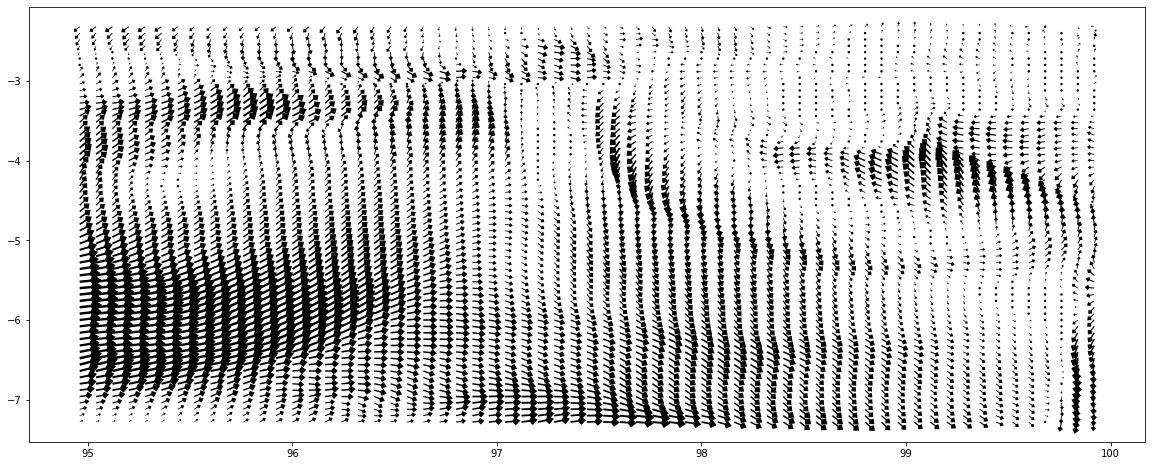

In [61]:
#Quiveeerrrrrr
import numpy as np
fig, ax = plt.subplots(figsize=(20, 8))
q = ax.quiver(lon, lat, u, v, headwidth=5, headlength=3, minshaft=3)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()